# Task 1B: Fruit classification with a CNN

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using "Fruits" dataset present in PyTorch and train a convolutional neural network (CNN) to classify digits.


## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like **loss curve**, show **confusion matrix** and since this is a CNN you can also consider **advance techniques like gradcam**, etc. 

You can also use techniques that allow for faster training, assuage problems involving vanishing and exploding gradients. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

## Absolutely required items?

1. First of all, import the libraries and the dataset. Divide the dataset into test and train.
2. Next, show dataset samples and distribution of different type of data. For example, in case of "Fruits Dataset" you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations (also **data augmentation**) on "Fruits dataset" (normalization, resizing, grayscaling, if required, etc.) using torchvision transforms.
4. Create required dataloaders with PyTorch and use the module dataset we created to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**.
7. Pick some manual random images (probably 7-10) from test dataset and predict their values showing **expected and actual result**. 

**NOTE: ** 
1. You may or may not choose to delete these instruction cells after completion of the notebook.
2. Keep the outputs of the cells.

In [1]:
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as nn
from utils import dataset
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [2]:
# loading dataframes using dataset module 
df, df_train, df_test = dataset.create_and_load_meta_csv_df(dataset_path='../Data/fruits/', destination_path='../Data/', randomize=True, split=0.6)

In [3]:
# using dataframes, pytorch and torchvision to transform data. Also, use dataloaders for batching, shuffling, etc.  
data_transforms = {
    'train': transforms.Compose([transforms.ToPILImage(),
                                 transforms.RandomHorizontalFlip(p=0.2),
                                 transforms.ToTensor()]),
    'val': transforms.Compose([transforms.ToPILImage(),
                                 transforms.RandomHorizontalFlip(p=0.2),
                                 transforms.ToTensor()])
}

image_datasets = {'train': dataset.ImageDataset(df_train, transform=data_transforms['train']), 
                  'val': dataset.ImageDataset(df_test, transform=data_transforms['val'])}

dataloaders = {'train': DataLoader(image_datasets['train'],batch_size=20,shuffle=True,num_workers=2),
               'val' : DataLoader(image_datasets['val'],batch_size=20,shuffle=True,num_workers=2)}

## Plotting samples

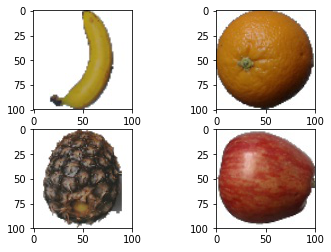

In [4]:
for i,im in enumerate(dataloaders['train']):
    f, axarr = plt.subplots(2,2)
    im[0] = torch.transpose(im[0],1,3)
    val = random.randint(0,len(im[0])-1)
    axarr[0,0].imshow(im[0][val])
    a = (im[1][val]).item()
    val = random.randint(0,len(im[0])-1)
    axarr[0,1].imshow(im[0][val])
    b = (im[1][val]).item()
    val = random.randint(0,len(im[0])-1)
    axarr[1,0].imshow(im[0][val])
    c = (im[1][val]).item()
    val = random.randint(0,len(im[0])-1)
    axarr[1,1].imshow(im[0][val])
    d = ((im[1][val])).item()
    break

## Distribution plot

Training set distribution:-
label
0    275
1    297
2    291
3    311
4    291
dtype: int64


Testing set distribution:-
label
0    217
1    193
2    188
3    179
4    201
dtype: int64


Blue - Training Dataset
Orange - Testing Dataset
X axis - Class labels
Y axis - Count


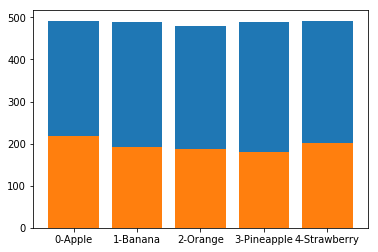

In [5]:
import pandas as pd
df_trainpd = pd.DataFrame(df_train)
df_testpd = pd.DataFrame(df_test)
traindist = df_trainpd.groupby('label').size()
testdist = df_testpd.groupby('label').size()

print("Training set distribution:-")
print((traindist))

print("\n\nTesting set distribution:-")
print(testdist)

traindist = traindist+testdist
plt.bar(range(5),traindist)
lis = ['0-Apple','1-Banana', "2-Orange", "3-Pineapple" , "4-Strawberry"]
plt.bar(lis,testdist)

print("\n\nBlue - Training Dataset\nOrange - Testing Dataset\nX axis - Class labels\nY axis - Count")

## Model Training

In [6]:
import model

In [7]:
net = model.FNet()
net = net.to(device)

[1,     1] loss: 0.321 acc: 0.060
[1,     6] loss: 1.610 acc: 0.230
[1,    11] loss: 1.605 acc: 0.320
[1,    16] loss: 1.599 acc: 0.430
[1,    21] loss: 1.596 acc: 0.450
[1,    26] loss: 1.589 acc: 0.530
[1,    31] loss: 1.578 acc: 0.590
[1,    36] loss: 1.573 acc: 0.670
[1,    41] loss: 1.574 acc: 0.540
[1,    46] loss: 1.571 acc: 0.580
[1,    51] loss: 1.546 acc: 0.580
[1,    56] loss: 1.559 acc: 0.540
[1,    61] loss: 1.529 acc: 0.590
[1,    66] loss: 1.507 acc: 0.610
[1,    71] loss: 1.509 acc: 0.530
[2,     1] loss: 0.286 acc: 0.120
[2,     6] loss: 1.447 acc: 0.630
[2,    11] loss: 1.414 acc: 0.580
[2,    16] loss: 1.407 acc: 0.470
[2,    21] loss: 1.372 acc: 0.510
[2,    26] loss: 1.319 acc: 0.430
[2,    31] loss: 1.369 acc: 0.380
[2,    36] loss: 1.267 acc: 0.520
[2,    41] loss: 1.335 acc: 0.350
[2,    46] loss: 1.176 acc: 0.520
[2,    51] loss: 1.218 acc: 0.440
[2,    56] loss: 1.213 acc: 0.410
[2,    61] loss: 1.178 acc: 0.440
[2,    66] loss: 1.190 acc: 0.400
[2,    71] los

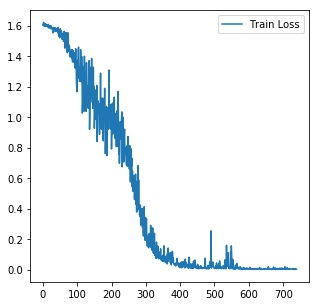

Finished Training


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
accuracies = []
losses = []

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    running_acc = 0.0
   
    for i, data in enumerate(dataloaders['train'], 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = torch.sum(torch.argmax(outputs,1) == labels).float() / labels.size()[0]
        
        losses.append(loss.item())
        accuracies.append(acc.item())

        running_loss += loss.item()
        running_acc += acc.item()
        
        if i % 5 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5, running_acc/5))
            running_loss = 0.0
            running_acc = 0.0

""" 
Plotting The Loss Curve
"""            
plt.figure(figsize=(5,5))
plt.plot(losses,label='Train Loss')
plt.legend()
plt.show()

print('Finished Training')

## Model Testing

[2,     1] loss: 0.000 acc: 0.200
[2,     6] loss: 0.002 acc: 1.000
[2,    11] loss: 0.002 acc: 1.000
[2,    16] loss: 0.004 acc: 1.000
[2,    21] loss: 0.002 acc: 1.000
[2,    26] loss: 0.002 acc: 1.000
[2,    31] loss: 0.002 acc: 1.000
[2,    36] loss: 0.004 acc: 1.000
[2,    41] loss: 0.003 acc: 1.000
[2,    46] loss: 0.003 acc: 1.000


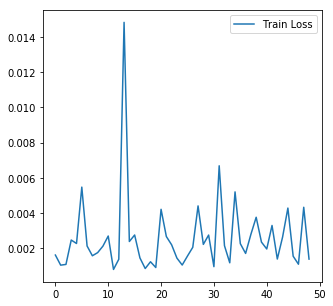

Overall test loss: 0.003 Overall test accuracy: 1.00


In [14]:
accuracies = []
losses = []
epoch = 1
running_loss = 0.0
running_acc = 0.0
for i, data in enumerate(dataloaders['val'], 0):
    # get the inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    acc = torch.sum(torch.argmax(outputs,1) == labels).float() / labels.size()[0]
    accuracies.append(acc.item())
    losses.append(loss.item())
    running_loss += loss.item()
    running_acc += acc.item()
    if i % 5 == 0:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f acc: %.3f' %
              (epoch + 1, i + 1, running_loss / 5, running_acc / 5))
        running_loss = 0.0
        running_acc = 0.0
        
""" 
Plotting The Loss Curve
"""            
plt.figure(figsize=(5,5))
plt.plot(losses,label='Train Loss')
plt.legend()
plt.show()

print("Overall test loss: %.3f Overall test accuracy: %.2f"%(np.mean(losses),np.mean(accuracies)))

## Predictions

In [15]:
classes = ['Apples','Banana','Orange','Pineapple','Strawberry']

In [16]:
preds,truth = [],[]
for i, data in enumerate(dataloaders['val'], 0):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = net(inputs)
    preds.extend(torch.argmax(outputs,1).cpu().numpy())
    truth.extend(labels.cpu().numpy())

In [19]:
p = pd.DataFrame(np.column_stack((preds,truth)), columns=['Predictions','True Labels'])
for i in range(5):
    p.replace(i,classes[i],inplace=True)
p.head(10)

,Predictions,True Labels
0,Apples,Apples
1,Apples,Apples
2,Apples,Apples
3,Pineapple,Pineapple
4,Banana,Banana
5,Banana,Banana
6,Pineapple,Pineapple
7,Apples,Apples
8,Pineapple,Pineapple
9,Apples,Apples


In [20]:
print("Accuracy : %f"%(p[p['Predictions'] == p['True Labels']].shape[0] / p.shape[0]))

Accuracy : 0.998978
